# **SEGMENTATION ANALYSIS**

## **1. Import Data**

In [1]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import warnings 
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import ttest_ind

In [2]:
# Import the CLEANED dataset
df = pd.read_csv('Dataset/QVI_data.csv')
product_df = pd.read_csv('Dataset/Prepared/product_info.csv')
customer_df = pd.read_csv('Dataset/Prepared/clean_QVI_purchase_behaviour.csv')

In [3]:
# Examine the cleaned file 
display(df.head(5))
display(product_df.head(5))
display(customer_df.head(5))

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


,PROD_NAME,PROD_NBR,PACK_SIZE,Brand_candidates
0,Natural Chip Compny SeaSalt175g,5,175,Natural
1,CCs Nacho Cheese 175g,66,175,CCs
2,Smiths Crinkle Cut Chips Chicken 170g,61,170,Smiths
3,Smiths Chip Thinly S/Cream&Onion 175g,69,175,Smiths
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,108,150,Kettle


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
# Adjust data type for 'DATE' in customer table 
df['DATE'] = pd.to_datetime(df['DATE'])

## **2. Customer Segmentations**

### **2.1. Customer Analysis**

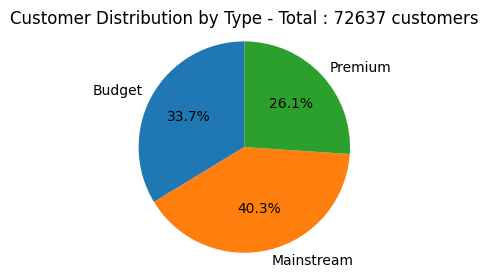

In [5]:
# Prepare df number of customer by customer type 
customer_by_type = customer_df.groupby('PREMIUM_CUSTOMER')['LYLTY_CARD_NBR'].count().reset_index()

# Calculate total customer 
total_customer = customer_df['LYLTY_CARD_NBR'].nunique()

# Plot the oie chart for customer by type 
plt.figure(figsize=(3, 3))
plt.pie(customer_by_type['LYLTY_CARD_NBR'], labels=customer_by_type['PREMIUM_CUSTOMER'], autopct='%1.1f%%', startangle=90)
plt.title(f'Customer Distribution by Type - Total : {total_customer} customers')
plt.axis('equal')
plt.show()

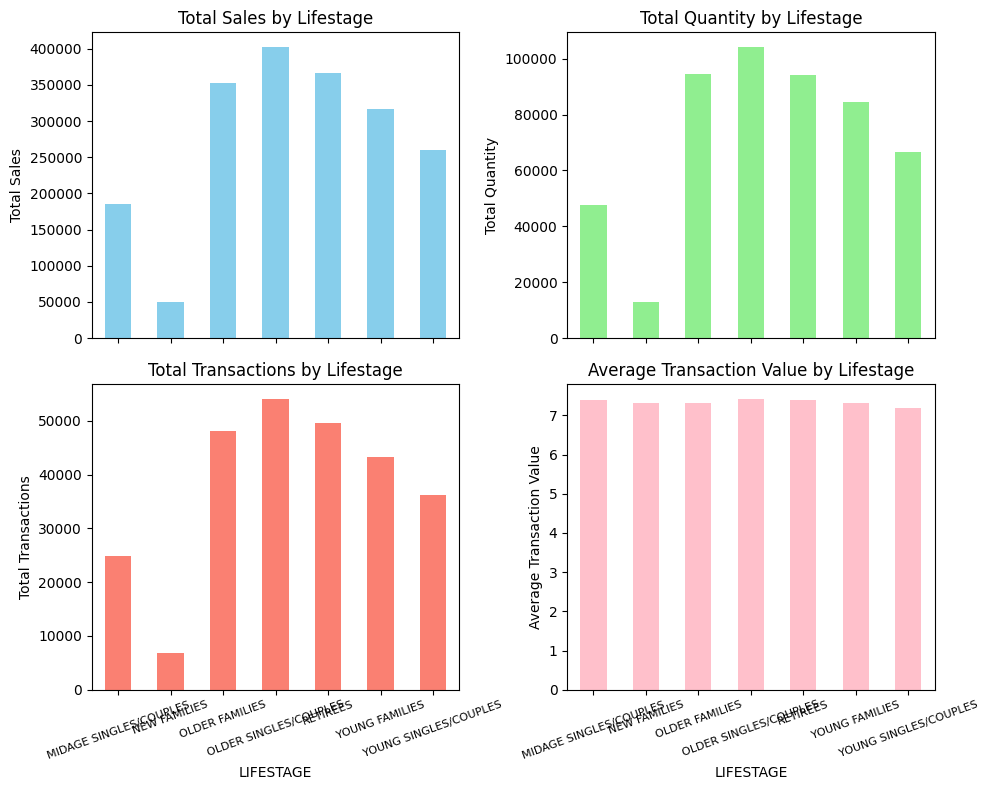

In [6]:
# Summarize sales by customer lifestage
sales_by_lifestage = df.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()

# Summarize product quantities by lifestage 
qty_by_lifestage = df.groupby('LIFESTAGE')['PROD_QTY'].sum().reset_index()

# Summarize transaction amounts by lifestage
trans_by_lifestage = df.groupby('LIFESTAGE')['TXN_ID'].nunique().reset_index()

# Summarize transaction values by lifestage by devide tot_sales by number of transactions
value_by_lifestage = sales_by_lifestage.merge(trans_by_lifestage, on='LIFESTAGE')
value_by_lifestage['TRANS_VALUE'] = value_by_lifestage['TOT_SALES'] / value_by_lifestage['TXN_ID']

# Plot 3 bar charts 
fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=True)
sales_by_lifestage.plot(kind='bar', x='LIFESTAGE', y='TOT_SALES', ax=ax[0,0], color='skyblue')
qty_by_lifestage.plot(kind='bar', x='LIFESTAGE', y='PROD_QTY', ax=ax[0,1], color='lightgreen')
trans_by_lifestage.plot(kind='bar', x='LIFESTAGE', y='TXN_ID', ax=ax[1,0], color='salmon')
value_by_lifestage.plot(kind='bar', x='LIFESTAGE',y='TRANS_VALUE', ax=ax[1,1], color='pink')

# Customize the plots
ax[0,0].set_title('Total Sales by Lifestage')
ax[0,0].set_ylabel('Total Sales')
ax[0,1].set_title('Total Quantity by Lifestage')
ax[0,1].set_ylabel('Total Quantity')
ax[1,0].set_title('Total Transactions by Lifestage')
ax[1,0].set_ylabel('Total Transactions')
ax[1,1].set_title('Average Transaction Value by Lifestage')
ax[1,1].set_ylabel('Average Transaction Value')
for axes in ax.flat:
    axes.get_legend().remove()

# Custommize x-axis labels
for axis in ax[1]:
    axis.set_xticklabels(axis.get_xticklabels(), rotation = 20, fontsize = 8)


plt.tight_layout()
plt.show()


#### **Customer base heatmap**

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'RETIREES'),
  Text(1.5, 0, 'OLDER SINGLES/COUPLES'),
  Text(2.5, 0, 'YOUNG SINGLES/COUPLES'),
  Text(3.5, 0, 'OLDER FAMILIES'),
  Text(4.5, 0, 'YOUNG FAMILIES'),
  Text(5.5, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(6.5, 0, 'NEW FAMILIES')])

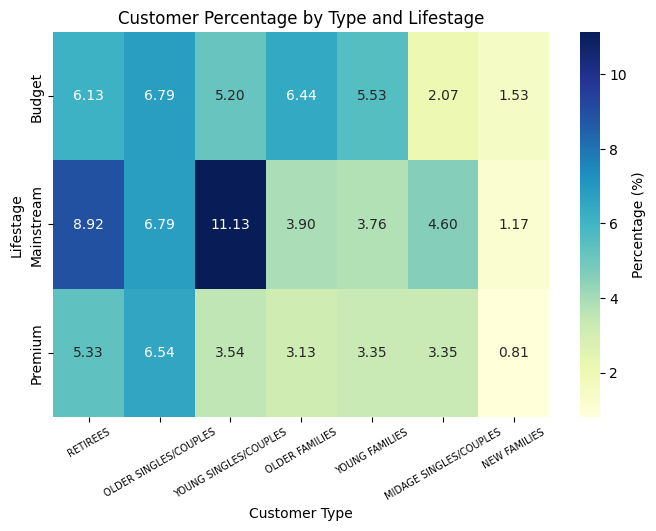

In [7]:
# Prepare data for stacked bar chart
customer_counts = customer_df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['LYLTY_CARD_NBR'].count().unstack(fill_value=0).transpose()
# Calculate the percentage of each customer type overall
customer_pct = customer_counts / total_customer * 100

customer_pct = customer_pct.transpose()  # Transpose for better visualization
# Arrange the columns of customer_pct according to the lifestage order from sales_by_lifestage
cus_by_lifestage = customer_df.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].count().reset_index()
cus_by_lifestage = cus_by_lifestage.sort_values(by='LYLTY_CARD_NBR',ascending=False)
lifestage_order = cus_by_lifestage['LIFESTAGE'].tolist()
customer_pct = customer_pct[lifestage_order]
# Plot the heatmap for customer percentage by type and lifestage
plt.figure(figsize=(8, 5))
sns.heatmap(customer_pct, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Percentage (%)'})
plt.title('Customer Percentage by Type and Lifestage')
plt.xlabel('Customer Type')
plt.ylabel('Lifestage')
plt.xticks(rotation=30,fontsize= 7)



In [8]:
# Assign top and bottom segment in a variables 

top_segments = sales_by_lifestage.sort_values('TOT_SALES', ascending=False).head(3)['LIFESTAGE'].tolist()
bottom_segments = sales_by_lifestage.sort_values('TOT_SALES', ascending= False).tail(2)['LIFESTAGE'].tolist()

#### **Sales heatmap by customer segmentations**

LIFESTAGE,OLDER SINGLES/COUPLES,RETIREES,OLDER FAMILIES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES,MIDAGE SINGLES/COUPLES,NEW FAMILIES
PREMIUM_CUSTOMER,,,,,,,
Budget,7.08,5.85,8.71,7.21,3.16,1.84,1.13
Mainstream,6.90,8.05,5.35,4.80,8.15,4.70,0.88
Premium,6.84,5.05,4.17,4.35,2.15,3.02,0.59


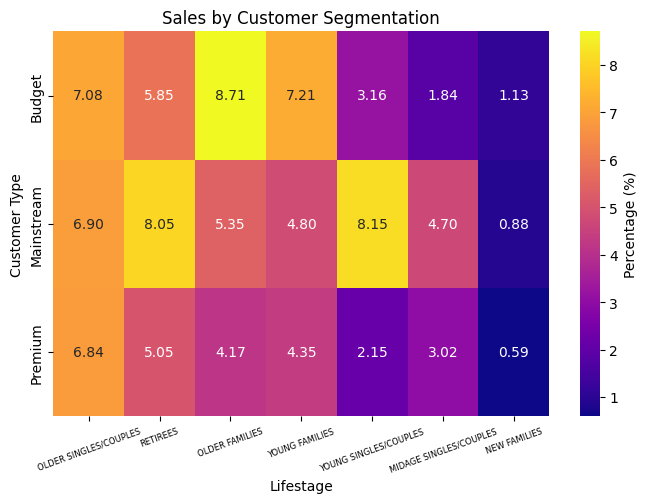

In [9]:
# Prepare the dataframe for heatmap
segment_heatmap = df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack(fill_value=0).transpose()
segment_heatmap = segment_heatmap.div(df['TOT_SALES'].sum()).multiply(100).round(2)


# Get the lifestage order from sales_by_lifestage, from largest to smallest sales 
lifestage_rank = sales_by_lifestage.sort_values(by="TOT_SALES", ascending=False)['LIFESTAGE'].tolist()
segment_heatmap = segment_heatmap[lifestage_rank]

# Plot the heatmap 
plt.figure(figsize=(8,5))
sns.heatmap(segment_heatmap,annot=True, fmt = ".2f",cbar_kws={'label': 'Percentage (%)'}, cmap = 'plasma')
plt.title("Sales by Customer Segmentation")
plt.ylabel("Customer Type")
plt.xlabel("Lifestage")
plt.xticks(rotation=20, fontsize=6)

display(segment_heatmap)



##### **Initial Analysis:**
- **1. Top Three Sales Drivers:** The market is dominated by three distinct segments, which together account for over a quarter of all sales:
    - **Budget - Older Families (8.71%):** This is the single most valuable segment, indicating that price-conscious families are a core driver of sales volume.
    - **Mainstream - Young Singles/Couples (8.15%):** This group represents a significant high-spending segment, likely with more disposable income.
    - **Mainstream - Retirees (8.05%):** This segment also contributes heavily, showing strong and consistent purchasing behavior.

- **2. Mid-tier segments:** Mainstream - Older Families (5.35%) and Premium - Older Singles/Couples (5.05%). 

- **3. Under-performing segments:** New Families and Mid-age Singles/Couples

#### **Value per Transactions Analysis**

Are the small differences in average spend per transaction between customer segments statistically significant, or are they just due to random chance?

In [10]:
# Create a datagframe of values per transaction for each customer lifestage and type
sales_by_segment = df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].sum().reset_index()
trans_by_segment = df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TXN_ID'].nunique().reset_index()

value_by_segment = pd.merge(sales_by_segment,trans_by_segment, on = ['PREMIUM_CUSTOMER', 'LIFESTAGE'], how = 'left')
value_by_segment['TRANS_VALUE'] = value_by_segment['TOT_SALES'] / value_by_segment['TXN_ID']
value_by_segment['TRANS_VALUE'] = value_by_segment['TRANS_VALUE'].round(2)

display(value_by_segment)

,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES,TXN_ID,TRANS_VALUE
0,Budget,MIDAGE SINGLES/COUPLES,35514.80,4988,7.12
1,Budget,NEW FAMILIES,21928.45,2991,7.33
2,Budget,OLDER FAMILIES,168363.25,22935,7.34
3,Budget,OLDER SINGLES/COUPLES,136769.80,18301,7.47
4,Budget,RETIREES,113147.80,15113,7.49
5,Budget,YOUNG FAMILIES,139345.85,18970,7.35
6,Budget,YOUNG SINGLES/COUPLES,61141.60,9214,6.64
7,Mainstream,MIDAGE SINGLES/COUPLES,90803.85,11801,7.69
8,Mainstream,NEW FAMILIES,17013.90,2321,7.33
9,Mainstream,OLDER FAMILIES,103445.55,14113,7.33


In [11]:
# Extract the top and bottom segments 
sales_by_segment['%_']  = (sales_by_segment['TOT_SALES'] / sales_by_segment['TOT_SALES'].sum() *100).round(2)
# Create a unified segments columns
sales_by_segment['SEGMENTS'] = sales_by_segment['PREMIUM_CUSTOMER'] + "-" + sales_by_segment['LIFESTAGE']

sales_by_segment = sales_by_segment.drop(columns=['PREMIUM_CUSTOMER','LIFESTAGE'])

# Sort by sales and extract top segments 
sales_by_segment = sales_by_segment.sort_values(by='TOT_SALES', ascending=False)

top_3_segments = sales_by_segment['SEGMENTS'].head(3).tolist()
bottom_2_segments = sales_by_segment['SEGMENTS'].tail(2).tolist()

##### **Are Customer Lifestages' Transaction values different from each other?**

In [12]:
# --- ANOVA TESTS to test if there is a significant difference in sales between customer lifestages ---

# Create a list of values for each lifestage
lifestage_values = [value_by_segment[value_by_segment['LIFESTAGE'] == lifestage]['TRANS_VALUE'] for lifestage in value_by_segment['LIFESTAGE'].unique()]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*lifestage_values)

# Print and interpret the results
print("ANOVA Test on Transaction Value across all Lifestage Groups")
print("----------------------------------------------------------")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("\nConclusion: The p-value is less than 0.05.")
    print("There is a statistically significant difference in the average transaction value among the lifestage groups.")
else:
    print("\nConclusion: The p-value is greater than 0.05.")
    print("There is NO statistically significant difference in the average transaction value among the lifestage groups.")

ANOVA Test on Transaction Value across all Lifestage Groups
----------------------------------------------------------
F-statistic: 1.25
P-value: 0.3379865653416356

Conclusion: The p-value is greater than 0.05.
There is NO statistically significant difference in the average transaction value among the lifestage groups.


##### **Do High-Value Segments Spend Differently Than Low-Value Segments? (T-Test)**
Hypothesis: The average transaction value of high-contributing lifestage groups is the same as the average transaction value of low-contributing groups.

In [13]:
# --- Define the two groups for the t-test ---

# Group 1: Top 3 Lifestages by Sales (Older Singles/Couples, Retirees, Older Families)
top_segments_value =value_by_segment[ value_by_segment['LIFESTAGE'].isin(['OLDER SINGLES/COUPLES','YOUNG SINGLES/COUPLES','RETIREES'])]['TRANS_VALUE']

# Group 2: Bottom 2 Lifestages by Sales (New Families, Midage Singles/Couples)
bottom_segments_value =value_by_segment[value_by_segment['LIFESTAGE'].isin(['NEW FAMILIES','MIDAGE SINGLES/COUPLES'])]['TRANS_VALUE']

# Perform the independent t-test 
t_stat, p_value = ttest_ind(top_segments_value,bottom_segments_value,equal_var = False)

# --- Print and interpret the results ---
print("\nT-test on Transaction Value: Top 3 vs. Bottom 2 Lifestages")
print("-------------------------------------------------------------")
print(f"Average transaction value for Top 3 group: ${top_segments_value.mean():.2f}")
print(f"Average transaction value for Bottom 2 group: ${bottom_segments_value.mean():.2f}")
print(f"\nT-statistic: {t_stat:.2f}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("\nConclusion: There is a statistically significant difference in average transaction value.")
else:
    print("\nConclusion: There is NO statistically significant difference in average transaction value.")


T-test on Transaction Value: Top 3 vs. Bottom 2 Lifestages
-------------------------------------------------------------
Average transaction value for Top 3 group: $7.27
Average transaction value for Bottom 2 group: $7.31

T-statistic: -0.29
P-value: 0.7734877276194286

Conclusion: There is NO statistically significant difference in average transaction value.


## **3. Product Performance**

### **3.1. Product performance analysis**

In [19]:
# Create a def function to display the top 5 and bottom 5
def display_top_bottom(df, sales_col, group_col,choice ="top"):
    """
    Display the top 5 and bottom 5 rows of a DataFrame sorted by metrics column.
    Args:
        df (pd.DataFrame): DataFrame to display.
        sales_col (str): Name of the sales column to sort by.
        group_col (str): Name of the group column to display.
    """
    group_df = df.groupby(sales_col)[group_col].sum().reset_index()
    group_df['%_'] = (group_df[group_col] / group_df[group_col].sum() *100).round(2)
    group_df = group_df.sort_values(by=group_col, ascending=False)

    if choice == 'top':
        print("Top 5:")
        display(group_df.head(5))
    else:
        print("Bottom 5:")
        display(group_df.tail(5))

   

display_top_bottom(df,'BRAND','TOT_SALES',"top")
display_top_bottom(df,'BRAND','TOT_SALES',"bottom")

Top 5:


,BRAND,TOT_SALES,%_
9,KETTLE,390239.8,20.19
5,DORITOS,240590.9,12.45
14,SMITHS,224660.2,11.62
12,PRINGLES,177655.5,9.19
8,INFUZIONS,99047.6,5.12


Bottom 5:


,BRAND,TOT_SALES,%_
1,CCS,18078.9,0.94
2,CHEETOS,16884.5,0.87
15,SUNBITES,9676.4,0.50
6,FRENCH,7929.0,0.41
0,BURGER,6831.0,0.35


**"Kettle", "Smiths", "Doritos" and "Pringles"** are the top 4 most popular among customers (contributing to **~54.0%**) while the rest of 17 brands share the remaining *46%* in term of sales. 

In [15]:
# Display top and bottom pack size 
display_top_bottom(df,'PACK_SIZE','TOT_SALES')
display_top_bottom(df,'PACK_SIZE','PROD_QTY')

Top 5:


,PACK_SIZE,TOT_SALES,%_
10,175,485437.4,25.11
6,150,304288.5,15.74
4,134,177655.5,9.19
2,110,162765.4,8.42
9,170,146673.0,7.59


Top 5:


,PACK_SIZE,PROD_QTY,%_
10,175,126467,25.06
6,150,82174,16.28
4,134,48019,9.51
2,110,42835,8.49
9,170,38088,7.55


The most popular pack sizes are **"175g" and "150g"** - the avarage size

In [16]:
# Caclulate price for each item 
df['PRICE'] = (df['TOT_SALES'] / df['PROD_QTY']).round(2)

# Calculate average price for each products 
avg_price = df.groupby(['PROD_NAME','BRAND','PACK_SIZE'])['PRICE'].mean().reset_index()
avg_price = avg_price.sort_values(by='PRICE',ascending = False)

### **3.2. Product Affinity of Segments**

In [18]:
# Top 3 segments 
print(top_3_segments)

['Budget-OLDER FAMILIES', 'Mainstream-YOUNG SINGLES/COUPLES', 'Mainstream-RETIREES']


In [27]:
# Create a 'SEGMENT' column in the main transaction df
df['SEGMENTS'] = df['PREMIUM_CUSTOMER'] +'-'+ df['LIFESTAGE']

In [39]:
# Calculate the affinity 

# Create a function to calculate affinity with brand by segments 
def calculate_affinity(df,segment,metric):
    group_df = df.groupby(['BRAND','SEGMENTS'])[metric].sum().unstack(fill_value = 0)
    # Extract other segments into a list 
    other_group = [s for s in df['SEGMENTS'].unique() if s != segment]

    # Create a column represent the others group
    group_df['OTHERS'] = group_df[other_group].sum(axis=1)
    # Drop the other group 
    group_df = group_df.drop(columns=other_group)

    # Calculate the targeted segment brand proportion 
    group_df[f'{segment}-%'] = group_df[segment] / group_df[segment].sum()
    # Calculate the rest groups brand proportion 
    group_df['OTHERS-%'] = group_df['OTHERS'] / group_df['OTHERS'].sum()

    # Calculate the brand affinity 
    group_df['Affinity'] = (group_df[f'{segment}-%'] / group_df['OTHERS-%']).round(2)

    # Drop the rest of the columns 
    group_df = group_df.drop(columns=['OTHERS-%','OTHERS',f'{segment}-%',segment])
    return group_df
# Loop through top_3_segment 
affinity_list = []
for segment in top_3_segments:
    affinity = calculate_affinity(df, segment, 'TOT_SALES')
    affinity.columns = [f"{segment}_Affinity"]
    affinity_list.append(affinity)
    
# Concatenate all affinity DataFrames in affinity_list by columns (axis=1)
affinity_df = pd.concat(affinity_list, axis=1)
affinity_df.index.name = 'BRAND'
display(affinity_df)


,Budget-OLDER FAMILIES_Affinity,Mainstream-YOUNG SINGLES/COUPLES_Affinity,Mainstream-RETIREES_Affinity
BRAND,,,
BURGER,1.18,0.42,0.95
CCS,1.20,0.56,0.96
CHEETOS,1.16,0.63,0.98
CHEEZELS,1.07,1.02,1.02
COBS,0.91,1.07,0.99
DORITOS,0.96,1.12,1.02
FRENCH,1.22,0.64,0.82
GRNWVES,1.00,1.00,1.07
INFUZIONS,0.97,1.09,1.03


## **4. Insights and Deepdive**

### **4.1. Analysis: Customer Segments & Purchasing Behavior (July 2018 - June 2019)**
**Key Observations:**

**1. Sales Performance is Driven by Older Demographics and Families**
The primary contributors to chip sales are three key lifestage segments:
- **Older Singles/Couples**: This group is the top performer, leading in Total Sales, Total Quantity purchased, and the Total Number of Transactions.
- **Retirees:** The second most valuable group, demonstrating high engagement across all key metrics.
- **Older Families**: Despite having a high proportion of "Budget" members, this segment ranks third for total sales, indicating they are a crucial and high-volume customer base.
- Conversely, *New Families* and *Midage Singles/Couples* show the lowest sales, quantity, and transaction counts, suggesting they are less engaged with the chip category.

**2. Mainstream and Budget Customers Dominate the Base**
An analysis of customer composition reveals:
- **Mainstream customers** are the largest group, closely followed by Budget customers. While Premium customers are the smallest segment, **Premium - Older Singles/Couples** segment (**6.54%**) is notably larger than many other mainstream or budget segments, indicating a loyal high-value group.
- **The Retirees and Older Singles/Couples lifestages have the highest number of customers overall**, with a strong concentration in the Mainstream and Budget tiers.
- **Young Singles/Couples also represent a large, primarily Mainstream** customer group, making up **11.13%** of the total customer base, making them a key target segment.
- **Mainstream Retirees** are the second largest group at **8.92%**.
- **New Families** represent the smallest portion of the customer base across all tiers (Budget: 1.53%, Mainstream: 1.17%, Premium: 0.81%)

**3. Average Spend Per Transaction is Highly Consistent**
- A standout finding is that the **Average Transaction Value** is remarkably stable across all lifestage segments, hovering **around $7.30**. This indicated that customers, regardless of their lifestage, tend to spend a similar amount on chips per shopping trip.
- This implies that the main driver of overall sales is not how much a customer spends on a single trip, but rather the **frequency of their purchases** and the **total number of customers** within that segment.

**4. Products performance Analysis:** 
An analysis of product sales reveals a highly concentrated market dominated by a few key brands and standard pack sizes.
- Of the 21 brands available, **the top four—Kettle, Smiths, Doritos, and Pringles**—are the clear market leaders, driving approximately **54%** of total sales over the last 12 months. This indicates strong brand loyalty and a market where a few "power brands" have significant influence.
- **Standard Pack Sizes Lead Sales:** The 175g and 150g formats are the most frequently purchased, aligning with industry standards.

#### **4.2. Summary for the Category Manager:**
- **Core Customer Segments:** The most valuable customers are Older Singles/Couples and Retirees, who are predominantly Mainstream and Budget shoppers. They buy frequently and in high quantities.
- **High-Potential Segment:** Older Families are a critical group. Despite being largely "Budget" oriented, their high purchase volume makes them a top-three contributor to sales. Strategies to increase their engagement could yield significant returns.
- **Key Sales Driver:** Growth in the chip category will likely come from increasing the number of transactions (shopping frequency) from key segments, rather than trying to increase the spend per visit.